# Computational Drug Discovery
## Exploratory Data Analysis (EDA)

In this Jupyter notebook, we will be performing Descriptor Calculation and Exploratory Data Analysis.

### Loading bioactivity data

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('RP1ab_03_bioactivity_data_curated.csv')

In [5]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.00,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.00,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.00,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.00,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.00,active
...,...,...,...,...
1131,CHEMBL5286307,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1[C@@H]2CCC...,18.06,active
1132,CHEMBL5282079,CC(C)(C)[C@H](NS(=O)(=O)C(F)(F)F)C(=O)N1C[C@H]...,22.42,active
1133,CHEMBL5275584,Cn1cnc2c1c(=O)n(CC(=O)Nc1ccc(S(=O)(=O)Nc3ncccn...,8060.00,intermediate
1134,CHEMBL5281103,Cn1c(=O)c2c(nc3n(CC#Cc4ccc(Cl)c(Cl)c4)ccn23)n(...,4700.00,intermediate


In [6]:
df.shape

(1136, 4)

In [7]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [8]:
df_no_smiles.shape

(1136, 3)

In [9]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [10]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL480,390.00,active,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1
1,CHEMBL178459,210.00,active,Cc1c(-c2cnccn2)ssc1=S
2,CHEMBL3545157,80.00,active,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1
3,CHEMBL297453,1580.00,intermediate,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...
4,CHEMBL4303595,40.00,active,O=C1C=Cc2cc(Br)ccc2C1=O
...,...,...,...,...
1131,CHEMBL5286307,18.06,active,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1[C@@H]2CCC...
1132,CHEMBL5282079,22.42,active,CC(C)(C)[C@H](NS(=O)(=O)C(F)(F)F)C(=O)N1C[C@H]...
1133,CHEMBL5275584,8060.00,intermediate,Cn1cnc2c1c(=O)n(CC(=O)Nc1ccc(S(=O)(=O)Nc3ncccn...
1134,CHEMBL5281103,4700.00,intermediate,Cn1c(=O)c2c(nc3n(CC#Cc4ccc(Cl)c(Cl)c4)ccn23)n(...


### Calculate Lipinski descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule.**

The Lipinski's Rule stated the following:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

[Lipinski's Rule of Five](https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/lipinskis-rule-of-five#:~:text=The%20rule%20of%205%20indicates,(cLogP)%20greater%20than%205.)

In [11]:
# Import libraries
import numpy as np

In [12]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [13]:
print(np.__version__)

1.26.4


### Calculate Descriptors

In [14]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [15]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0
...,...,...,...,...
1131,499.534,1.38378,3.0,5.0
1132,535.589,0.85788,3.0,6.0
1133,470.471,-0.33680,2.0,11.0
1134,402.241,2.04490,0.0,7.0


### Combine DataFrames
Let's take a look at the 2 DataFrames that will be combined.

In [16]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0
...,...,...,...,...
1131,499.534,1.38378,3.0,5.0
1132,535.589,0.85788,3.0,6.0
1133,470.471,-0.33680,2.0,11.0
1134,402.241,2.04490,0.0,7.0


In [17]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.00,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.00,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.00,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.00,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.00,active
...,...,...,...,...
1131,CHEMBL5286307,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1[C@@H]2CCC...,18.06,active
1132,CHEMBL5282079,CC(C)(C)[C@H](NS(=O)(=O)C(F)(F)F)C(=O)N1C[C@H]...,22.42,active
1133,CHEMBL5275584,Cn1cnc2c1c(=O)n(CC(=O)Nc1ccc(S(=O)(=O)Nc3ncccn...,8060.00,intermediate
1134,CHEMBL5281103,Cn1c(=O)c2c(nc3n(CC#Cc4ccc(Cl)c(Cl)c4)ccn23)n(...,4700.00,intermediate


Now, let's combine the 2 DataFrame

In [18]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [19]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.00,active,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.00,active,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.00,active,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.00,intermediate,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.00,active,237.052,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
1131,CHEMBL5286307,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1[C@@H]2CCC...,18.06,active,499.534,1.38378,3.0,5.0
1132,CHEMBL5282079,CC(C)(C)[C@H](NS(=O)(=O)C(F)(F)F)C(=O)N1C[C@H]...,22.42,active,535.589,0.85788,3.0,6.0
1133,CHEMBL5275584,Cn1cnc2c1c(=O)n(CC(=O)Nc1ccc(S(=O)(=O)Nc3ncccn...,8060.00,intermediate,470.471,-0.33680,2.0,11.0
1134,CHEMBL5281103,Cn1c(=O)c2c(nc3n(CC#Cc4ccc(Cl)c(Cl)c4)ccn23)n(...,4700.00,intermediate,402.241,2.04490,0.0,7.0


### Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

* Take the IC50 values from the `standard_value` column and converts it from nM to M by multiplying the value by 10
* Take the molar value and apply -log10
* Delete the `standard_value` column and create a new `pIC50` column

In [21]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [22]:
df_combined.standard_value.describe()

count      1136.000000
mean      12265.795232
std       31680.470990
min           0.013000
25%         180.000000
50%         845.000000
75%        7610.000000
max      425000.000000
Name: standard_value, dtype: float64

In [23]:
-np.log10( (10**-9)* 100000000 )

1.0

In [24]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [25]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [26]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,390.00
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,210.00
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,80.00
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,1580.00
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,40.00
...,...,...,...,...,...,...,...,...
1131,CHEMBL5286307,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1[C@@H]2CCC...,active,499.534,1.38378,3.0,5.0,18.06
1132,CHEMBL5282079,CC(C)(C)[C@H](NS(=O)(=O)C(F)(F)F)C(=O)N1C[C@H]...,active,535.589,0.85788,3.0,6.0,22.42
1133,CHEMBL5275584,Cn1cnc2c1c(=O)n(CC(=O)Nc1ccc(S(=O)(=O)Nc3ncccn...,intermediate,470.471,-0.33680,2.0,11.0,8060.00
1134,CHEMBL5281103,Cn1c(=O)c2c(nc3n(CC#Cc4ccc(Cl)c(Cl)c4)ccn23)n(...,intermediate,402.241,2.04490,0.0,7.0,4700.00


In [27]:
df_norm.standard_value_norm.describe()

count      1136.000000
mean      12265.795232
std       31680.470990
min           0.013000
25%         180.000000
50%         845.000000
75%        7610.000000
max      425000.000000
Name: standard_value_norm, dtype: float64

In [28]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
1131,CHEMBL5286307,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1[C@@H]2CCC...,active,499.534,1.38378,3.0,5.0,7.743282
1132,CHEMBL5282079,CC(C)(C)[C@H](NS(=O)(=O)C(F)(F)F)C(=O)N1C[C@H]...,active,535.589,0.85788,3.0,6.0,7.649364
1133,CHEMBL5275584,Cn1cnc2c1c(=O)n(CC(=O)Nc1ccc(S(=O)(=O)Nc3ncccn...,intermediate,470.471,-0.33680,2.0,11.0,5.093665
1134,CHEMBL5281103,Cn1c(=O)c2c(nc3n(CC#Cc4ccc(Cl)c(Cl)c4)ccn23)n(...,intermediate,402.241,2.04490,0.0,7.0,5.327902


In [29]:
df_final.pIC50.describe()

count    1136.000000
mean        5.992470
std         1.168985
min         3.371611
25%         5.118616
50%         6.073151
75%         6.744727
max        10.886057
Name: pIC50, dtype: float64

In [ ]:
#df_final.to_csv('RP1ab_04_bioactivity_data_3class_pIC50.csv')

### Removing the 'intermediate' bioactivity class
Here, we will be removing the intermediate class from our data set.

In [30]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
6,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,active,209.252,2.55240,2.0,3.0,6.443697
...,...,...,...,...,...,...,...,...
1128,CHEMBL5279748,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1CC2(CC2)C[...,active,485.507,0.99528,3.0,5.0,7.433916
1129,CHEMBL5283975,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1[C@@H]2CC[...,active,485.507,0.99368,3.0,5.0,7.262489
1130,CHEMBL5266964,CC(C)(C)[C@H](NS(=O)(=O)C1CC1)C(=O)N1C[C@H]2[C...,active,507.657,0.50048,3.0,6.0,7.641494
1131,CHEMBL5286307,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1[C@@H]2CCC...,active,499.534,1.38378,3.0,5.0,7.743282


In [ ]:
#df_2class.to_csv('RP1ab_05_bioactivity_data_2class_pIC50.csv')

## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [31]:
# Import library
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes

C:\Users\a_als\AppData\Local\Temp\ipykernel_24720\1246648440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['#432371',"#FAAE7B"])


Text(0, 0.5, 'Frequency')

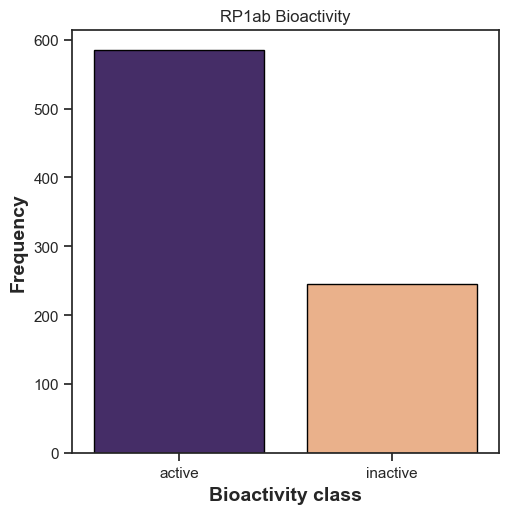

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['#432371',"#FAAE7B"])

plt.title('RP1ab Bioactivity')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('RP1ab_plot_bioactivity_class.pdf')
#plt.savefig('RP1ab_plot_bioactivity_class.png')

### Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

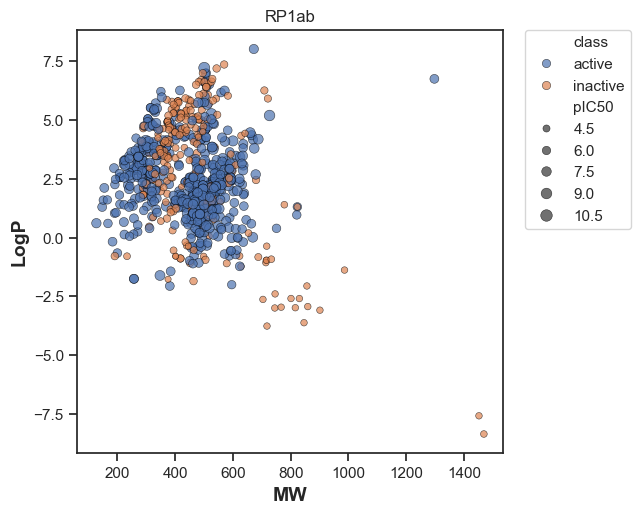

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.title('RP1ab')
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#plt.savefig('RP1ab_plot_MW_vs_LogP.pdf')
#plt.savefig('RP1ab_plot_MW_vs_LogP.png')

### Box plots
pIC50 value

C:\Users\a_als\AppData\Local\Temp\ipykernel_24720\4186091658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, palette=['#432371',"#FAAE7B"])


Text(0, 0.5, 'pIC50 value')

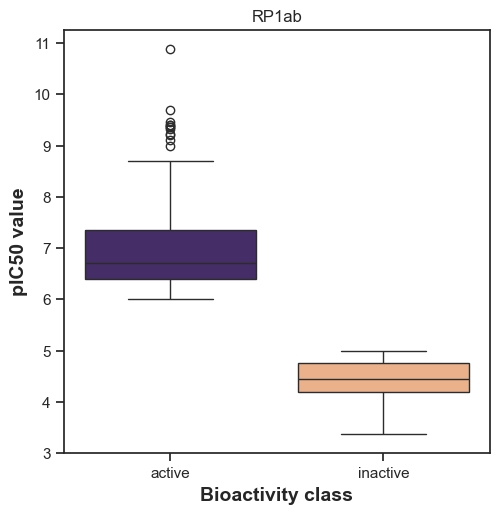

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, palette=['#432371',"#FAAE7B"])

plt.title('RP1ab')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

#plt.savefig('RP1ab_plot_ic50.pdf')
#plt.savefig('RP1ab_plot_ic50.png')

### Statistical analysis | Mann-Whitney U Test

In [35]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [36]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,143325.0,1.499451e-114,0.05,Different distribution (reject H0)


### MW

C:\Users\a_als\AppData\Local\Temp\ipykernel_24720\2439715326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'MW', data = df_2class, palette=['#432371',"#FAAE7B"])


Text(0, 0.5, 'MW')

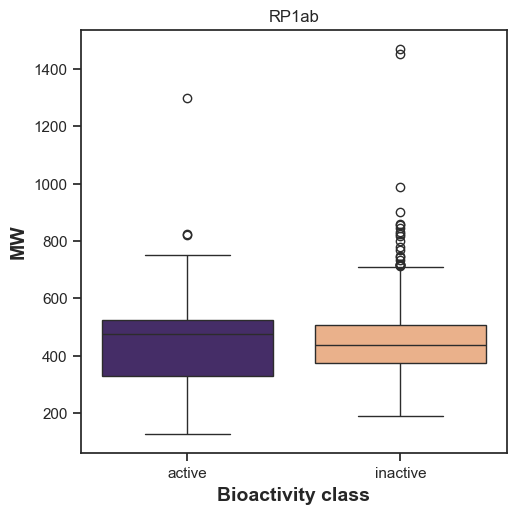

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class, palette=['#432371',"#FAAE7B"])

plt.title('RP1ab')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

#plt.savefig('RP1ab_plot_MW.pdf')
#plt.savefig('RP1ab_plot_MW.png')

In [38]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,71932.5,0.931829,0.05,Same distribution (fail to reject H0)


### LogP

C:\Users\a_als\AppData\Local\Temp\ipykernel_24720\511427687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'LogP', data = df_2class, palette=['#432371',"#FAAE7B"])


Text(0, 0.5, 'LogP')

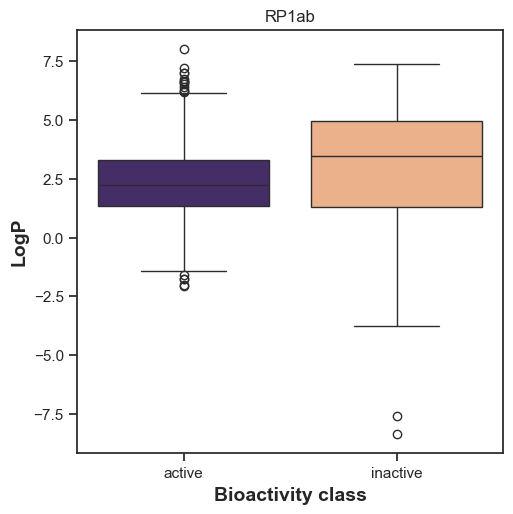

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class, palette=['#432371',"#FAAE7B"])

plt.title('RP1ab')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

#plt.savefig('RP1ab_plot_LogP.pdf')
#plt.savefig('RP1ab_plot_LogP.png')

In [40]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,57106.0,0.000004,0.05,Different distribution (reject H0)


### NumHDonors

C:\Users\a_als\AppData\Local\Temp\ipykernel_24720\3952798972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=['#432371',"#FAAE7B"])


Text(0, 0.5, 'NumHDonors')

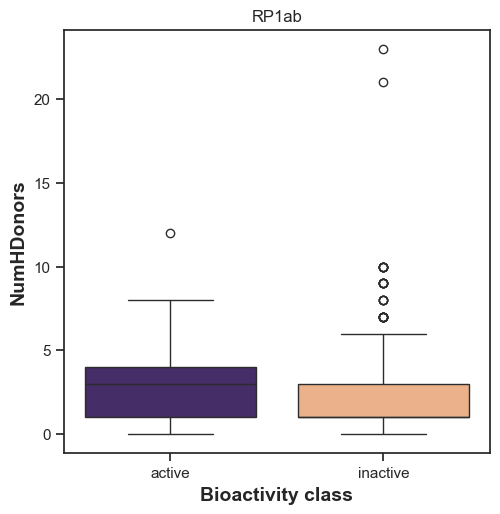

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=['#432371',"#FAAE7B"])

plt.title('RP1ab')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

#plt.savefig('RP1ab_plot_NumHDonors.pdf')
#plt.savefig('RP1ab_plot_NumHDonors.png')

In [42]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,79514.0,0.011112,0.05,Different distribution (reject H0)


### NumHAcceptors

C:\Users\a_als\AppData\Local\Temp\ipykernel_24720\963096690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=['#432371',"#FAAE7B"])


Text(0, 0.5, 'NumHAcceptors')

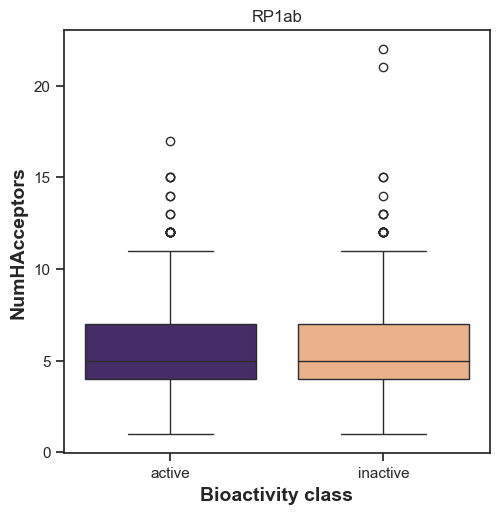

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=['#432371',"#FAAE7B"])

plt.title('RP1ab')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

#plt.savefig('RP1ab_plot_NumHAcceptors.pdf')
#plt.savefig('RP1ab_plot_NumHAcceptors.png')

In [44]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,72274.0,0.844226,0.05,Same distribution (fail to reject H0)


### Interpretation of Statistical Results

**Box Plots**

**pIC50 values**

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), MW and NumHAcceptors exhibited no difference between the actives and inactives while the other 2 descriptors (LogP and NumHDonors) shows statistically significant difference between actives and inactives.